<a href="https://colab.research.google.com/github/sabin5105/CIFAR10/blob/main/basiccnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from baseline import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [24]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [25]:
(train_datas, train_labels), (test_datas, test_labels) = datasets.cifar10.load_data()

train_datas, test_datas = train_datas / 255, test_datas / 255

170498071/170498071 [==============================] - 2s 0us/step


In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [29]:
from tensorflow.keras import losses, optimizers

model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(
    train_datas, train_labels,
    validation_data=(test_datas, test_labels),
    batch_size=4,
    epochs=10
)

Epoch 1/10
12500/12500 [==============================] - 202s 16ms/step - loss: 1.4693 - accuracy: 0.4631 - val_loss: 1.2093 - val_accuracy: 0.5672
Epoch 2/10
12500/12500 [==============================] - 173s 14ms/step - loss: 1.1538 - accuracy: 0.5920 - val_loss: 1.1028 - val_accuracy: 0.6115
Epoch 3/10
12500/12500 [==============================] - 174s 14ms/step - loss: 1.0300 - accuracy: 0.6382 - val_loss: 1.1034 - val_accuracy: 0.6129
Epoch 4/10
12500/12500 [==============================] - 163s 13ms/step - loss: 0.9403 - accuracy: 0.6716 - val_loss: 1.0165 - val_accuracy: 0.6495
Epoch 5/10
12500/12500 [==============================] - 159s 13ms/step - loss: 0.8790 - accuracy: 0.6927 - val_loss: 1.0310 - val_accuracy: 0.6498
Epoch 6/10
12500/12500 [==============================] - 161s 13ms/step - loss: 0.8302 - accuracy: 0.7097 - val_loss: 0.9672 - val_accuracy: 0.6701
Epoch 7/10
12500/12500 [==============================] - 171s 14ms/step - loss: 0.7813 - accuracy: 0.7283

In [30]:
pred = model.predict(test_datas)

313/313 [==============================] - 7s 22ms/step


In [31]:
# accuracy
from sklearn.metrics import *
import numpy as np

pred = np.argmax(pred, axis = 1)
print("Accuracy: ", accuracy_score(test_labels, pred))
print("F1 Score: ", f1_score(test_labels, pred, average='macro'))
print("Recall: ", recall_score(test_labels, pred, average='macro'))
print("Precision: ", precision_score(test_labels, pred, average='macro'))
print("-"*70)

Accuracy:  0.6642
F1 Score:  0.6592797412008438
Recall:  0.6642
Precision:  0.670068399915653
----------------------------------------------------------------------


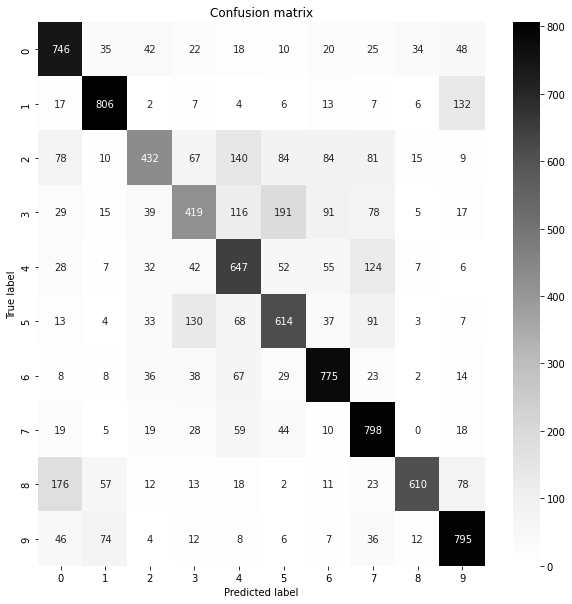

In [33]:
# visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greys')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
from sklearn.metrics import classification_report
print("Classification Report: ", classification_report(test_labels, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.79      0.81      0.80      1000
           2       0.66      0.43      0.52      1000
           3       0.54      0.42      0.47      1000
           4       0.57      0.65      0.60      1000
           5       0.59      0.61      0.60      1000
           6       0.70      0.78      0.74      1000
           7       0.62      0.80      0.70      1000
           8       0.88      0.61      0.72      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

